<center><h1>Last_First_HW8</h1></center>

Name: 
<br>
Github Username: 
<br>
USC ID: 

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import NearestNeighbors

# to surpress warnings
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [9]:
!pip3 install -U ucimlrepo 

In [26]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [27]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [28]:
# Encode y: M - 1, B - 0
le = LabelEncoder()
y = le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

In [114]:
# Initialize lists to store scores for each iteration
accuracy_scores_train, precision_scores_train, recall_scores_train, f1_scores_train, auc_scores_train = [], [], [], [], []
accuracy_scores_test, precision_scores_test, recall_scores_test, f1_scores_test, auc_scores_test = [], [], [], [], []

M = 30  # Number of iterations

for i in tqdm(range(M)):
    # Split data into train and test sets with 20% of both classes in the test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    # Normalize data
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # Create an SVM classifier
    svm_model = LinearSVC(penalty='l1', dual=False, random_state=42)

    # Define a grid of hyperparameters to search (C values)
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

    # Perform grid search using 5-fold cross-validation
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_normalized, y_train)

    # Get the best model from grid search
    final_model = grid_search.best_estimator_

    # Train the best model on the whole training set
    final_model.fit(X_train_normalized, y_train)

    # Predict on training and test sets
    y_pred_train = final_model.predict(X_train_normalized)
    y_pred_test = final_model.predict(X_test_normalized)

    # Calculate evaluation metrics
    accuracy_scores_train.append(accuracy_score(y_train, y_pred_train))
    precision_scores_train.append(precision_score(y_train, y_pred_train))
    recall_scores_train.append(recall_score(y_train, y_pred_train))
    f1_scores_train.append(f1_score(y_train, y_pred_train))
    auc_scores_train.append(roc_auc_score(y_train, y_pred_train))

    accuracy_scores_test.append(accuracy_score(y_test, y_pred_test))
    precision_scores_test.append(precision_score(y_test, y_pred_test))
    recall_scores_test.append(recall_score(y_test, y_pred_test))
    f1_scores_test.append(f1_score(y_test, y_pred_test))
    auc_scores_test.append(roc_auc_score(y_test, y_pred_test))

100%|██████████| 30/30 [00:06<00:00,  4.70it/s]


In [115]:
# Calculate average scores over M runs
average_scores_train = {
    'Accuracy': np.mean(accuracy_scores_train),
    'Precision': np.mean(precision_scores_train),
    'Recall': np.mean(recall_scores_train),
    'F1-score': np.mean(f1_scores_train),
    'AUC': np.mean(auc_scores_train)
}

average_scores_test = {
    'Accuracy': np.mean(accuracy_scores_test),
    'Precision': np.mean(precision_scores_test),
    'Recall': np.mean(recall_scores_test),
    'F1-score': np.mean(f1_scores_test),
    'AUC': np.mean(auc_scores_test)
}

# Display average scores
print("Average Scores (Training):\n", pd.DataFrame(average_scores_train, index=[0]))
print("\nAverage Scores (Testing):\n", pd.DataFrame(average_scores_test, index=[0]))

Average Scores (Training):
    Accuracy  Precision    Recall  F1-score       AUC
0  0.984762   0.990228  0.968824  0.979386  0.981546

Average Scores (Testing):
    Accuracy  Precision    Recall  F1-score      AUC
0  0.969298   0.971898  0.944444    0.9573  0.96412


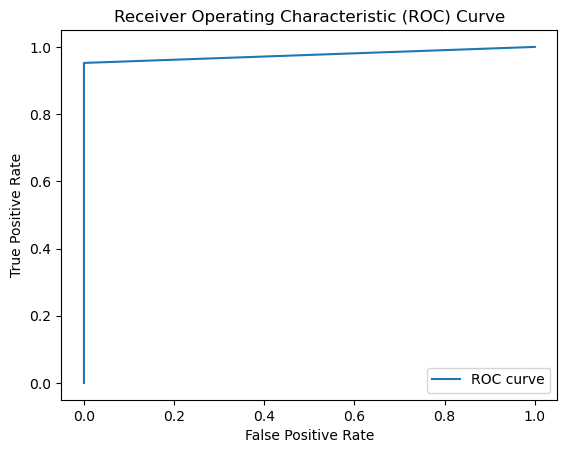

Confusion Matrix (Training):
 [[284   1]
 [  4 166]]

Confusion Matrix (Training):
 [[72  0]
 [ 2 40]]


In [116]:
# Plot ROC curve for one of the runs
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Report confusion matrix for one of the runs
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Training):\n", conf_matrix_train)
print("\nConfusion Matrix (Training):\n", conf_matrix_test)

#### (ii) Semi-Supervised Learning/ Self-training

##### (A) & (B)

In [111]:
# Initialize lists to store scores for each iteration
accuracy_scores_train, precision_scores_train, recall_scores_train, f1_scores_train, auc_scores_train = [], [], [], [], []
accuracy_scores_test, precision_scores_test, recall_scores_test, f1_scores_test, auc_scores_test = [], [], [], [], []

M = 30  # Number of iterations

for i in tqdm(range(M)):
    # Split data into train and test sets with 20% of both classes in the test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    # Get indices of positive and negative samples
    positive_indices = np.where(y_train == 1)[0]
    negative_indices = np.where(y_train == 0)[0]

    # Shuffle indices to randomize data selection
    np.random.shuffle(positive_indices)
    np.random.shuffle(negative_indices)

    # Calculate the number of samples needed for labeled data (50% of each class)
    num_positive_labeled = len(positive_indices) // 2
    num_negative_labeled = len(negative_indices) // 2

    # Select 50% of both positive and negative classes for labeled data
    labeled_positive_indices = positive_indices[:num_positive_labeled]
    labeled_negative_indices = negative_indices[:num_negative_labeled]

    # Combine labeled indices from both classes
    labeled_indices = np.concatenate([labeled_positive_indices, labeled_negative_indices])


    # Create labeled and unlabeled datasets
    X_labeled = X_train.iloc[labeled_indices]
    y_labeled = y_train[labeled_indices]

    # Create unlabeled dataset
    unlabeled_positive_indices = positive_indices[num_positive_labeled:]
    unlabeled_negative_indices = negative_indices[num_negative_labeled:]
    unlabeled_indices = np.concatenate([unlabeled_positive_indices, unlabeled_negative_indices])

    X_unlabeled = X_train.iloc[unlabeled_indices]
    y_unlabeled = y_train[unlabeled_indices]

    # Normalize data
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_labeled)
    X_test_normalized = scaler.transform(X_test)

    # Create an SVM classifier
    svm_model = LinearSVC(penalty='l1', dual=False, random_state=42)

    # Define a grid of hyperparameters to search (C values)
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}

    # Perform grid search using 5-fold cross-validation
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_normalized, y_labeled)

    # Get the best model from grid search
    final_model = grid_search.best_estimator_

    # Train the best model on the whole training set
    final_model.fit(X_train_normalized, y_labeled)

    # Iterative labeling process
    while len(X_unlabeled) > 0:
        # Find the unlabeled point farthest to the decision boundary
        distances = final_model.decision_function(X_unlabeled)
        farthest_idx = np.argmax(np.abs(distances))
        farthest_point = pd.DataFrame(X_unlabeled).iloc[farthest_idx]
        farthest_label = final_model.predict([farthest_point])[0]

        # Label the farthest point and add it to the labeled data
        X_labeled = np.append(X_labeled, [farthest_point], axis=0)
        y_labeled = np.append(y_labeled, [farthest_label], axis=0)

        # Remove the labeled point from the unlabeled data
        X_unlabeled = np.delete(X_unlabeled, farthest_idx, axis=0)
        y_unlabeled = np.delete(y_unlabeled, farthest_idx, axis=0)

        # Normailize the data
        X_train_normalized = scaler.fit_transform(X_labeled)

        # Retrain the SVM with the updated labeled data
        final_model.fit(X_train_normalized, y_labeled)
    
    # Predict on training and test sets
    X_train_normalized = scaler.fit_transform(X_train) # Use all training data (unlabeled & labeled to get the prediction)

    y_pred_train = final_model.predict(X_train_normalized)
    y_pred_test = final_model.predict(X_test_normalized)

    # Calculate evaluation metrics
    accuracy_scores_train.append(accuracy_score(y_train, y_pred_train))
    precision_scores_train.append(precision_score(y_train, y_pred_train))
    recall_scores_train.append(recall_score(y_train, y_pred_train))
    f1_scores_train.append(f1_score(y_train, y_pred_train))
    auc_scores_train.append(roc_auc_score(y_train, y_pred_train))

    accuracy_scores_test.append(accuracy_score(y_test, y_pred_test))
    precision_scores_test.append(precision_score(y_test, y_pred_test))
    recall_scores_test.append(recall_score(y_test, y_pred_test))
    f1_scores_test.append(f1_score(y_test, y_pred_test))
    auc_scores_test.append(roc_auc_score(y_test, y_pred_test))

100%|██████████| 30/30 [01:16<00:00,  2.56s/it]



Average Scores (Training):
    Accuracy  Precision    Recall  F1-score       AUC
0  0.661538   0.533747  0.996275   0.69209  0.729073

Average Scores (Testing):
    Accuracy  Precision    Recall  F1-score       AUC
0  0.644152   0.518711  0.990476  0.677586  0.716303


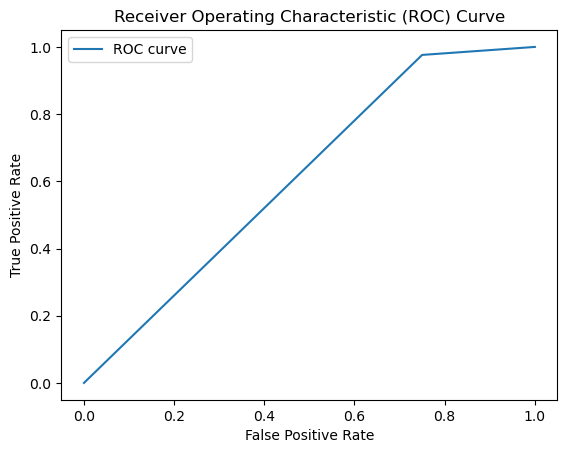

Confusion Matrix (Training):
 [[112 173]
 [  1 169]]

Confusion Matrix (Training):
 [[18 54]
 [ 1 41]]


In [113]:
# Calculate average scores over M runs
semi_average_scores_train = {
    'Accuracy': np.mean(accuracy_scores_train),
    'Precision': np.mean(precision_scores_train),
    'Recall': np.mean(recall_scores_train),
    'F1-score': np.mean(f1_scores_train),
    'AUC': np.mean(auc_scores_train)
}

semi_average_scores_test = {
    'Accuracy': np.mean(accuracy_scores_test),
    'Precision': np.mean(precision_scores_test),
    'Recall': np.mean(recall_scores_test),
    'F1-score': np.mean(f1_scores_test),
    'AUC': np.mean(auc_scores_test)
}

# Display average scores
print("\nAverage Scores (Training):\n", pd.DataFrame(semi_average_scores_train, index=[0]))
print("\nAverage Scores (Testing):\n", pd.DataFrame(semi_average_scores_test, index=[0]))

# Plot ROC curve for one of the runs
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Report confusion matrix for one of the runs
semi_conf_matrix_test = confusion_matrix(y_test, y_pred_test)
semi_conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Training):\n", semi_conf_matrix_train)
print("\nConfusion Matrix (Training):\n", semi_conf_matrix_test)

#### (iii) Unsupervised Learning

##### (A) & (B)

A. To avoid local minima, we use multiple initializations and choose the best result. We use 'n_init' parameter in KMeans to specify the number of initializations

In [117]:
M = 30  # Number of iterations
un_results_train = []
un_results_test = []

for i in tqdm(range(M)):
    # Split data into train and test sets with 20% of both classes in the test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    # Unsupervised Learning: Run k-means on the whole training set with k=2
    kmeans = KMeans(n_clusters=2, n_init=10, random_state=i)  # Random initialization for each iteration
    kmeans.fit(X_train)

    # B. Find closest points to each cluster center and predict labels based on majority poll
    cluster_centers = kmeans.cluster_centers_
    closest_indices = [np.argsort(np.linalg.norm(X_train - center, axis=1))[:30] for center in cluster_centers]
    majority_labels = [np.bincount(y_train[indices]).argmax() for indices in closest_indices]

    # Predict labels for training data
    predicted_labels_train = [majority_labels[label] for label in kmeans.labels_]

    # Calculate evaluation metrics for training set
    accuracy_train = accuracy_score(y_train, predicted_labels_train)
    precision_train = precision_score(y_train, predicted_labels_train)
    recall_train = recall_score(y_train, predicted_labels_train)
    f1_train = f1_score(y_train, predicted_labels_train)
    auc_train = roc_auc_score(y_train, predicted_labels_train)

    # Store results for training data
    un_results_train.append({
        'Accuracy': accuracy_train,
        'Precision': precision_train,
        'Recall': recall_train,
        'F1-score': f1_train,
        'AUC': auc_train
    })

    # C. Classify test data based on their proximity to the cluster centers
    closest_cluster_to_test_point = kmeans.predict(X_test)
    predicted_labels_test = [majority_labels[label] for label in closest_cluster_to_test_point]

    # Calculate evaluation metrics for test set
    accuracy_test = accuracy_score(y_test, predicted_labels_test)
    precision_test = precision_score(y_test, predicted_labels_test)
    recall_test = recall_score(y_test, predicted_labels_test)
    f1_test = f1_score(y_test, predicted_labels_test)
    auc_test = roc_auc_score(y_test, predicted_labels_test)

    # Store results for test data
    un_results_test.append({
        'Accuracy': accuracy_test,
        'Precision': precision_test,
        'Recall': recall_test,
        'F1-score': f1_test,
        'AUC': auc_test
    })

100%|██████████| 30/30 [00:01<00:00, 24.23it/s]



Average Scores (Training):
    Accuracy  Precision    Recall  F1-score      AUC
0  0.851209   0.991338  0.607059  0.752771  0.80195


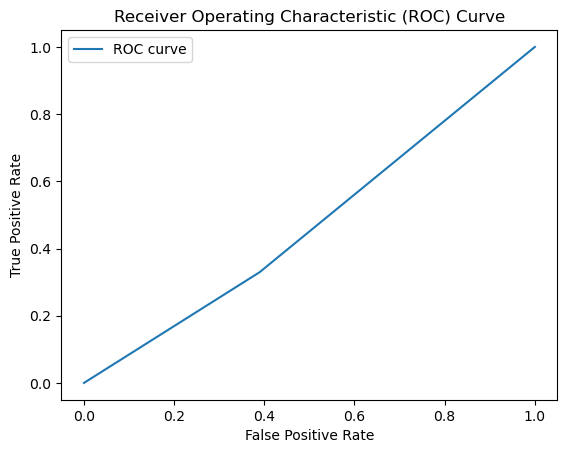

Confusion Matrix (Training):
 [[174 111]
 [114  56]]


In [118]:
# Calculate average scores over M runs for training set
un_average_scores_train = {metric: np.mean([result[metric] for result in un_results_train]) for metric in un_results_train[0]}


print("\nAverage Scores (Training):\n", pd.DataFrame(un_average_scores_train, index=[0]))

# Plot ROC curve for one of the runs
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Report confusion matrix for one of the runs
un_conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Training):\n", un_conf_matrix_train)

##### (C)


Average Scores (Testing):
    Accuracy  Precision    Recall  F1-score       AUC
0   0.85614   0.996087  0.611905  0.755443  0.805258


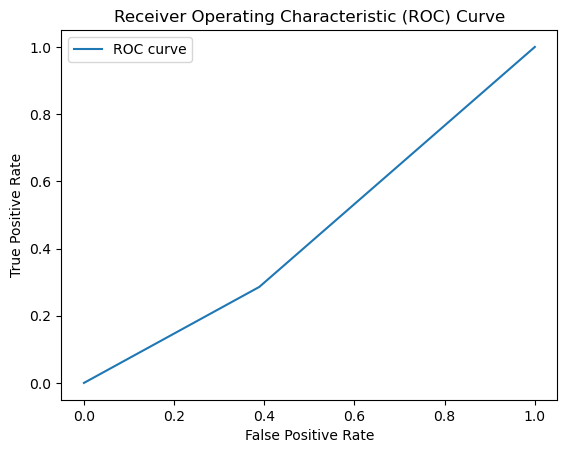


Confusion Matrix (Testing):
 [[44 28]
 [30 12]]


In [121]:
# Calculate average scores over M runs for test set
un_average_scores_test = {metric: np.mean([result[metric] for result in un_results_test]) for metric in un_results_test[0]}

# Display average scores
print("\nAverage Scores (Testing):\n", pd.DataFrame(un_average_scores_test, index=[0]))

# Plot ROC curve for one of the runs
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Report confusion matrix for one of the runs
un_conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix (Testing):\n", un_conf_matrix_test)


#### (iv) Spectral Clustering

Spectral clustering is a technique that leverages the eigenvectors of a similarity matrix representing the relationships between data points to perform clustering. It's based on the concept of spectral graph theory, where data points are viewed as nodes in a graph, and the affinity or similarity between points is captured in the graph's edges.

In [128]:
M = 30  # Number of iterations
results_train = []
results_test = []

for i in tqdm(range(M)):
    # Split data into train and test sets with 20% of both classes in the test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    # Spectral Clustering
    spectral = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1, random_state=i)
    predicted_labels_train = spectral.fit_predict(X_train)

    # Calculate evaluation metrics for training set
    accuracy_train = accuracy_score(y_train, predicted_labels_train)
    precision_train = precision_score(y_train, predicted_labels_train)
    recall_train = recall_score(y_train, predicted_labels_train)
    f1_train = f1_score(y_train, predicted_labels_train)
    auc_train = roc_auc_score(y_train, predicted_labels_train)

    # Store results for training data
    results_train.append({
        'Accuracy': accuracy_train,
        'Precision': precision_train,
        'Recall': recall_train,
        'F1-score': f1_train,
        'AUC': auc_train
    })

    # Predict labels for test data
    predicted_labels_test = spectral.fit_predict(X_test)

    # Calculate evaluation metrics for test set
    accuracy_test = accuracy_score(y_test, predicted_labels_test)
    precision_test = precision_score(y_test, predicted_labels_test)
    recall_test = recall_score(y_test, predicted_labels_test)
    f1_test = f1_score(y_test, predicted_labels_test)
    auc_test = roc_auc_score(y_test, predicted_labels_test)

    # Store results for test data
    results_test.append({
        'Accuracy': accuracy_test,
        'Precision': precision_test,
        'Recall': recall_test,
        'F1-score': f1_test,
        'AUC': auc_test
    })


100%|██████████| 30/30 [04:17<00:00,  8.59s/it]



Average Scores (Training):
    Accuracy  Precision    Recall  F1-score       AUC
0  0.626374   0.133333  0.001176   0.00233  0.500237


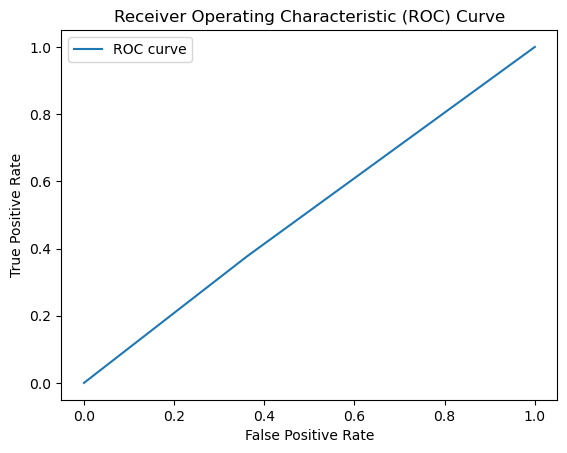

Confusion Matrix (Training):
 [[182 103]
 [106  64]]


In [129]:
# Calculate average scores over M runs for training set
average_scores_train = {metric: np.mean([result[metric] for result in results_train]) for metric in results_train[0]}

print("\nAverage Scores (Training):\n", pd.DataFrame(average_scores_train, index=[0]))

# Plot ROC curve for one of the runs
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Report confusion matrix for one of the runs
un_conf_matrix_train = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix (Training):\n", un_conf_matrix_train)


Average Scores (Testing):
    Accuracy  Precision    Recall  F1-score       AUC
0   0.85614   0.996087  0.611905  0.755443  0.805258


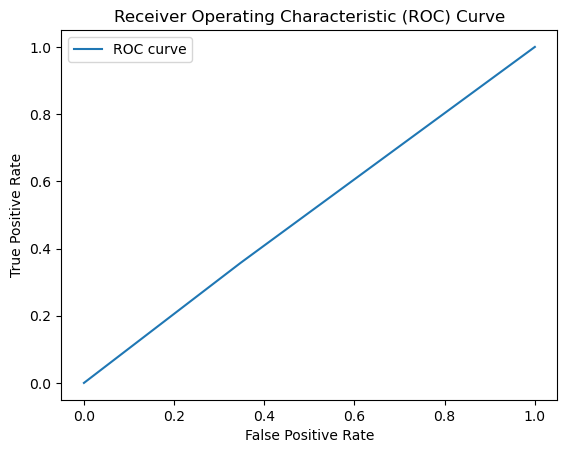


Confusion Matrix (Testing):
 [[47 25]
 [27 15]]


In [130]:
# Calculate average scores over M runs for test set
un_average_scores_test = {metric: np.mean([result[metric] for result in un_results_test]) for metric in un_results_test[0]}

# Display average scores
print("\nAverage Scores (Testing):\n", pd.DataFrame(un_average_scores_test, index=[0]))

# Plot ROC curve for one of the runs
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Report confusion matrix for one of the runs
un_conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix (Testing):\n", un_conf_matrix_test)

#### (iv) Compare

In my results, supervised learning > unsupervised learning > semi-supervised learning, based on the testing accuracy.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [139]:
banknote_df = pd.read_csv("../Homework 8 Data/data_banknote_authentication.txt", header=None,
                          names= ["variance", "skewness", "curtosis", "entropy", "class"])
banknote_df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [141]:
train_set, test_set = train_test_split(banknote_df, test_size=472, random_state=42, stratify=banknote_df["class"])

# Separating features and target labels
X_train = train_set.drop(columns=['class'])
y_train = train_set['class']

X_test = test_set.drop(columns=['class'])
y_test = test_set['class']

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

In [154]:
X_train

,variance,skewness,curtosis,entropy
636,2.15260,-6.1665,8.0831,-0.34355
133,0.43390,5.5395,2.0330,-0.40432
338,0.96414,5.6160,2.2138,-0.12501
1048,-0.84710,3.1329,-3.0112,-2.93880
1278,0.53936,3.8944,-4.8166,-4.34180
...,...,...,...,...
615,-0.20620,9.2207,-3.7044,-6.81030
26,1.14320,-3.7413,5.5777,-0.63578
1119,-1.43750,-1.8624,4.0260,0.55127
635,1.89670,-2.5163,2.8093,-0.79742


In [157]:
# Define initial variables
num_runs = 50
pool_sizes = np.arange(10, len(X_train)+10, 10)  # Pool sizes from 10 to the size of the training set

test_errors = []

X_train_copy = X_train.copy()  # Create a copy of the original training set
y_train_copy = y_train.copy()

test_errors_run = []
pool_indices = []  # Indices of selected data points in the pool

for pool_size in pool_sizes:
    # Select randomly 10 data points to add to the pool without replacement
    selected_indices = np.random.choice(X_train_copy.index, size=10, replace=False)
    pool_indices.extend(selected_indices)

    # Remove selected points from the training set
    X_pool = X_train_copy.loc[pool_indices]
    y_pool = y_train_copy.loc[pool_indices]

In [158]:
pool_sizes

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900])

In [165]:
y_pool

733    0
527    0
451    0
493    0
671    0
360    0
78     0
714    0
84     0
758    0
Name: class, dtype: int64

In [168]:
num_runs = 50
pool_sizes = np.arange(10, len(X_train) + 1, 10)  # Pool sizes from 10 to the size of the training set

test_errors = []

for run in tqdm(range(num_runs)):
    X_train_copy = X_train.copy()  # Create a copy of the original training set
    y_train_copy = y_train.copy()

    test_errors_run = []
    pool_indices = []  # Indices of selected data points in the pool

    for pool_size in pool_sizes:
        pool_generated = False
        while not pool_generated:
            # Select randomly 10 data points to add to the pool without replacement
            selected_indices = np.random.choice(X_train_copy.index, size=10, replace=False)
            
            # Ensure selected indices are within the DataFrame's index range
            selected_indices = [idx for idx in selected_indices if idx in X_train_copy.index]

            # Use the filtered selected indices for further processing
            X_pool = X_train_copy.loc[selected_indices]
            y_pool = y_train_copy.loc[selected_indices]

            # Remove selected points from the training set copy
            X_train_copy = X_train_copy.drop(index=selected_indices)
            y_train_copy = y_train_copy.drop(index=selected_indices)

            # Ensure at least two unique classes are present in the pool
            unique_classes = np.unique(y_pool)
            if len(unique_classes) >= 2:
                pool_generated = True
            else:
                # Regenerate the pool if it doesn't have at least two classes
                X_train_copy = pd.concat([X_train_copy, X_pool])
                y_train_copy = pd.concat([y_train_copy, y_pool])
        
        # Train SVM with linear kernel and L1 penalty using 5-fold cross-validation
        svm = LinearSVC(penalty='l1', dual=False, random_state=42)
        parameters = {'C': [0.001, 0.01, 0.1, 1, 10]}  
        clf = GridSearchCV(svm, parameters, cv=5)
        clf.fit(X_pool, y_pool)

        # Evaluate on the test set
        y_pred = clf.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_pred)
        test_errors_run.append(test_error)

    test_errors.append(test_errors_run)


100%|██████████| 50/50 [02:58<00:00,  3.58s/it]


In [170]:
test_errors_passive = test_errors
print(len(test_errors_passive))

50


#### (ii) Active

In [181]:
num_runs = 50
pool_sizes = np.arange(10, len(X_train) + 1, 10)  # Pool sizes from 10 to the size of the training set

test_errors_active = []

for run in tqdm(range(num_runs)):
    X_train_copy = X_train.copy()  # Create a copy of the original training set
    y_train_copy = y_train.copy()

    test_errors_run = []
    pool_indices = []  # Indices of selected data points in the pool
    max_iterations = 100

    for pool_size in pool_sizes:
        pool_generated = False
        iteration_count = 0  
        while not pool_generated and iteration_count < max_iterations and len(X_train_copy) >= 10:
            selected_indices = np.random.choice(X_train_copy.index, size=10, replace=False)

            selected_indices = [idx for idx in selected_indices if idx in X_train_copy.index]

            X_pool = X_train_copy.loc[selected_indices]
            y_pool = y_train_copy.loc[selected_indices]

            X_train_copy = X_train_copy.drop(index=selected_indices)
            y_train_copy = y_train_copy.drop(index=selected_indices)

            unique_classes = np.unique(y_pool)
            if len(unique_classes) >= 2:
                pool_generated = True

                iteration_count += 1
            else:
                # Regenerate the pool if it doesn't have at least two classes
                X_train_copy = pd.concat([X_train_copy, X_pool])
                y_train_copy = pd.concat([y_train_copy, y_pool])

        while len(X_train_copy) > 0:
            # Train SVM using the current pool
            svm = LinearSVC(penalty='l1', dual=False, random_state=42)
            parameters = {'C': [0.001, 0.01, 0.1, 1, 10]}  # Specify your C values
            clf = GridSearchCV(svm, parameters, cv=5)
            clf.fit(X_pool, y_pool)

            # Find the 10 closest data points to the hyperplane of the SVM
            distances = clf.decision_function(X_train_copy)
            closest_indices = np.argsort(np.abs(distances))[:10]
            closest_points = X_train_copy.iloc[closest_indices]
            closest_labels = y_train_copy.iloc[closest_indices]

            # Add closest points to the pool
            X_pool = pd.concat([X_pool, closest_points])
            y_pool = pd.concat([y_pool, closest_labels])

            # Remove closest points from the training set copy
            X_train_copy = X_train_copy.drop(index=closest_points.index)
            y_train_copy = y_train_copy.drop(index=closest_points.index)

        # Train SVM using the final pool
        svm = LinearSVC(penalty='l1', dual=False, random_state=42)
        parameters = {'C': [0.001, 0.01, 0.1, 1, 10]}  # Specify your C values
        clf = GridSearchCV(svm, parameters, cv=5)
        clf.fit(X_pool, y_pool)

        # Evaluate on the test set
        y_pred = clf.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_pred)
        test_errors_run.append(test_error)

    test_errors.append(test_errors_run)

100%|██████████| 50/50 [14:21<00:00, 17.24s/it]


In [182]:
test_errors_active = test_errors

### (c) Average the 50 test errors

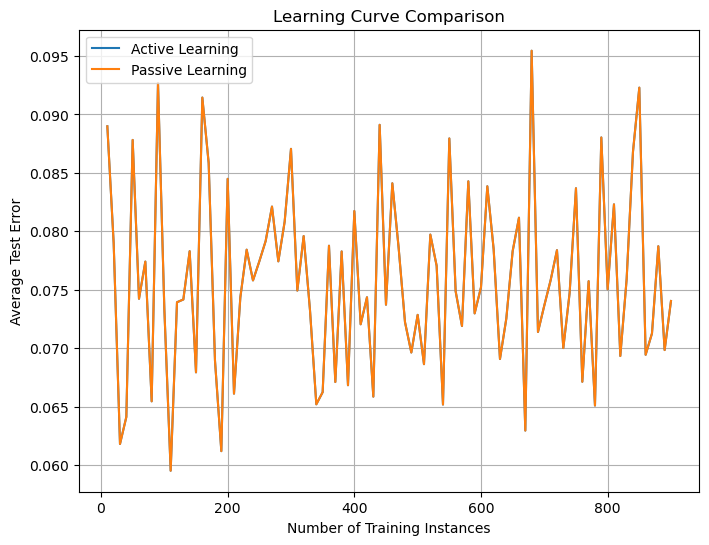

In [183]:
num_runs = 50
pool_sizes = np.arange(10, len(X_train) + 1, 10)  # Pool sizes from 10 to the size of the training set

# Calculate average test errors for active learning
active_avg_errors = np.mean(test_errors_active, axis=0)

# Calculate average test errors for passive learning
passive_avg_errors = np.mean(test_errors_passive, axis=0)

# Plotting learning curves
plt.figure(figsize=(8, 6))
plt.plot(pool_sizes, active_avg_errors, label='Active Learning')
plt.plot(pool_sizes, passive_avg_errors, label='Passive Learning')

plt.title('Learning Curve Comparison')
plt.xlabel('Number of Training Instances')
plt.ylabel('Average Test Error')
plt.legend()
plt.grid(True)
plt.show()